In [1]:
import numpy as np
import ruler
from matplotlib import pyplot as plt

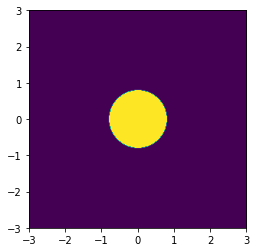

In [2]:
# examples in 2d
nx,ny = 300,300
design_width,design_height = 6,6
x_coord,y_coord = np.linspace(-design_width/2, design_width/2, nx),np.linspace(-design_height/2, design_height/2, ny)
xv, yv = np.meshgrid(x_coord, y_coord, sparse=True, indexing='ij')

diameter = 1.6
xc,yc = 0,0
disc = np.where((xv-xc)**2+(yv-yc)**2<=diameter**2/4,1,0)

plt.figure()
plt.imshow(disc,extent=[x_coord[0],x_coord[-1],y_coord[0],y_coord[-1]])
plt.show()

In [3]:
phys_size = [design_height,design_width] # physical size of the 2d design
# the two elements correspond to the row and the column of the 2d array, respectively

obj = ruler.morph(phys_size)
min_ls = obj.minimum_length(disc) # search the minimum length scale
print("The minimum length scale of the disc is ",min_ls)

The minimum length scale of the disc is  1.599609375


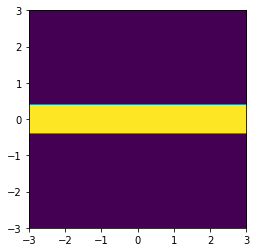

In [4]:
width = 0.8
horizontal_stripe = np.tile(np.where(np.abs(xv)<=width/2,1,0),ny)

plt.figure()
plt.imshow(horizontal_stripe,extent=[x_coord[0],x_coord[-1],y_coord[0],y_coord[-1]])
plt.show()

In [5]:
min_ls = obj.minimum_length(horizontal_stripe) # search the minimum length scale
print("The minimum length scale of the horizontal stripe is ",min_ls)

The minimum length scale of the horizontal stripe is  0.826171875


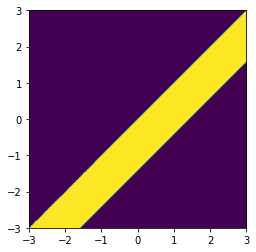

In [6]:
width,intercept,angle = 1,1/np.sqrt(2),0.25*np.pi
oblique_stripe = np.where(yv*np.cos(angle)+xv*np.sin(angle)>=intercept*np.sin(angle)-width/2,1,0)*np.where(
    yv*np.cos(angle)+xv*np.sin(angle)<=intercept*np.sin(angle)+width/2,1,0)

plt.figure()
plt.imshow(oblique_stripe,extent=[x_coord[0],x_coord[-1],y_coord[0],y_coord[-1]])
plt.show()

In [7]:
phys_size = [design_height,design_width] # physical size of the 2d design
margin_size = [0,1,0,1] # widths of marginal region to be ignored
# the first and second elements correspond to the row, and the third and fourth elements correspond to the column

obj = ruler.morph(phys_size,margin_size)
min_ls = obj.minimum_length(oblique_stripe) # search the minimum length scale
print("The minimum length scale of the oblique stripe is ",min_ls)

The minimum length scale of the oblique stripe is  0.990234375


In [8]:
# examples in 3d
nx, ny, nz = 80, 80, 80
sx, sy, sz = 2, 2, 2
x_coord, y_coord, z_coord = np.linspace(-sx/2, sx/2, nx), np.linspace(-sy/2, sy/2, ny), np.linspace(-sz/2, sz/2, nz)
xv,yv,zv = np.meshgrid(x_coord, y_coord, z_coord, sparse=True, indexing='ij')

# ball with the diameter 0.8
diameter = 0.8
xc, yc, zc = 0,0,0
ball = np.where((xv-xc)**2+(yv-yc)**2+(zv-zc)**2<=diameter**2/4,1,0)

phys_size = [sx,sy,sz] # physical size of the 3d design
obj = ruler.morph(phys_size)
min_ls = obj.minimum_length(ball) # search the minimum length scale
print("The minimum length scale of the ball is ",min_ls);

The minimum length scale of the ball is  0.8046875


In [9]:
# slab with the thickness 0.8
width = 0.8
slab= np.tile(np.where(np.abs(xv)<=width/2,1,0),(ny,nz))

min_ls = obj.minimum_length(slab) # search the minimum length scale
print("The minimum length scale of the slab is ",min_ls);

The minimum length scale of the slab is  0.8359375


In [10]:
# stick with the diameter 0.8
diameter = 0.8
stick = np.tile(np.where(xv**2+yv**2<=diameter**2/4,1,0),nz)

min_ls = obj.minimum_length(stick) # search the minimum length scale
print("The minimum length scale of the stick is ",min_ls);

The minimum length scale of the stick is  0.8046875


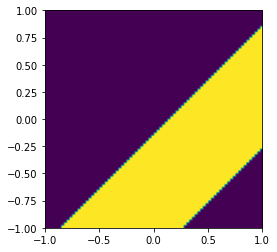

In [11]:
# oblique slab with the thickness 0.8
width,intercept,angle = 0.8,1/np.sqrt(2),0.25*np.pi
oblique_stripe = np.where(yv*np.cos(angle)+xv*np.sin(angle)>=intercept*np.sin(angle)-width/2,1,0)*np.where(
    yv*np.cos(angle)+xv*np.sin(angle)<=intercept*np.sin(angle)+width/2,1,0)
oblique_slab = np.tile(oblique_stripe,nz)

plt.figure()
plt.imshow(oblique_stripe[:,:,0],extent=[x_coord[0],x_coord[-1],y_coord[0],y_coord[-1]]) # cross section
plt.show()

In [12]:
phys_size = [sx,sy,sz] # physical size of the 2d design
margin_size = [0,0.4,0,0.4,0,0] # widths of marginal region to be ignored, the three pairs of elements correspond the three dimensions

obj = ruler.morph(phys_size,margin_size)
min_ls = obj.minimum_length(oblique_slab) # search the minimum length scale
print("The minimum length scale of the oblique slab is ",min_ls);

The minimum length scale of the oblique slab is  0.8203125
